<a href="https://colab.research.google.com/github/renzom1/Trabajo-Final-Simulaciones/blob/main/DOS%2BPDOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving borato_pdos.zip to borato_pdos (2).zip


/tmp/ipython-input-3-1828889584.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-3-1828889584.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-3-1828889584.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-3-1828889584.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


Error procesando borato_pdos/Nueva carpeta/Borato (1).pdos_tot: list index out of range


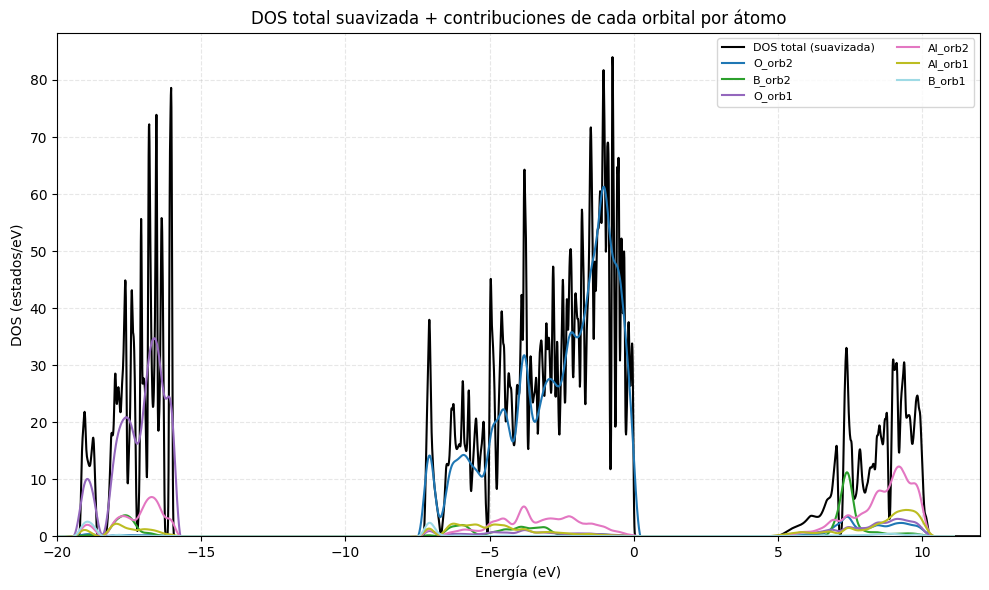

In [ ]:
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import defaultdict

# Cargamos ZIP y extraemos
from google.colab import files
uploaded = files.upload()
with zipfile.ZipFile("borato_pdos.zip", 'r') as zip_ref:
    zip_ref.extractall("borato_pdos")

# Leo DOS total y hago corrimiento en energía del nivel de Fermi (QE lo mueve a veces) y suavizo DOS total (sólo por claridad visual)
dos = pd.read_csv("borato_pdos/Nueva carpeta/Borato (9).dos", delimiter="\s+", skiprows=1)
dos.columns = ['E', 'dos', 'int']
shift = -3.76
dos["E_shifted"] = dos["E"] + shift
dos["dos_suavizado"] = gaussian_filter1d(dos["dos"], sigma=2)

# Leo y agrupo PDOS por orbital
archivos_pdos = glob.glob("borato_pdos/**/*.pdos*", recursive=True)
pdos_grupo = defaultdict(list)

for archivo in archivos_pdos:
    try:
        nombre = os.path.basename(archivo)
        # Extraemos tipo de átomo y orbital, x ej O_2s
        elemento = nombre.split('atm#')[1].split('(')[1].split(')')[0]
        orbital = nombre.split('wfc#')[1].split('(')[0]
        clave = f"{elemento}_orb{orbital}"

        df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
        df.columns = ["E", "ldos"]
        df["E_shifted"] = df["E"] + shift
        pdos_grupo[clave].append(df)
    except Exception as e:
        print(f"Error procesando {archivo}: {e}")

# Sumamos contribuciones por grupo
pdos_suma = {}
for clave, lista_df in pdos_grupo.items():
    base = lista_df[0][["E_shifted"]].copy()
    base["ldos"] = sum(df["ldos"].values for df in lista_df)
    pdos_suma[clave] = base

# Grafico
plt.figure(figsize=(10,6))

# DOS suavizada
plt.plot(dos["E_shifted"], dos["dos_suavizado"], label="DOS total", color="black", linewidth=1.5)

# PDOS sumadas por tipo de átomo y orbital
colores = plt.cm.tab20(np.linspace(0, 1, len(pdos_suma)))
for (clave, df), color in zip(pdos_suma.items(), colores):
    plt.plot(df["E_shifted"], df["ldos"], label=clave, color=color)

plt.xlabel("Energía (eV)")
plt.ylabel("DOS (estados/eV)")
plt.title("DOS total + contribuciones de cada orbital por átomo")
plt.xlim(-20, 12)
plt.ylim(bottom=0)
plt.legend(fontsize=8, loc='upper right', ncol=2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import glob
archivos_pdos = glob.glob("borato_pdos/**/*.pdos*", recursive=True)
print(archivos_pdos[:5])

['borato_pdos/Nueva carpeta/Borato.pdos_atm#40(O)_wfc#2(p)', 'borato_pdos/Nueva carpeta/Borato.pdos_atm#24(B)_wfc#2(p)', 'borato_pdos/Nueva carpeta/Borato (1).pdos_atm#25(O)_wfc#2(p)', 'borato_pdos/Nueva carpeta/Borato.pdos_atm#29(O)_wfc#2(p)', 'borato_pdos/Nueva carpeta/Borato.pdos_atm#56(O)_wfc#1(s)']


**EN ESTA CELDA REPITO EL CÓDIGO ANTERIOR PERO CAMBIO NOMENCLATURA DE ORBITALES**

Saving borato_pdos.zip to borato_pdos.zip


/tmp/ipython-input-1-2017224093.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-1-2017224093.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-1-2017224093.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-1-2017224093.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


Error procesando borato_pdos/Nueva carpeta/Borato (1).pdos_tot: list index out of range


/tmp/ipython-input-1-2017224093.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-1-2017224093.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-1-2017224093.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
/tmp/ipython-input-1-2017224093.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead


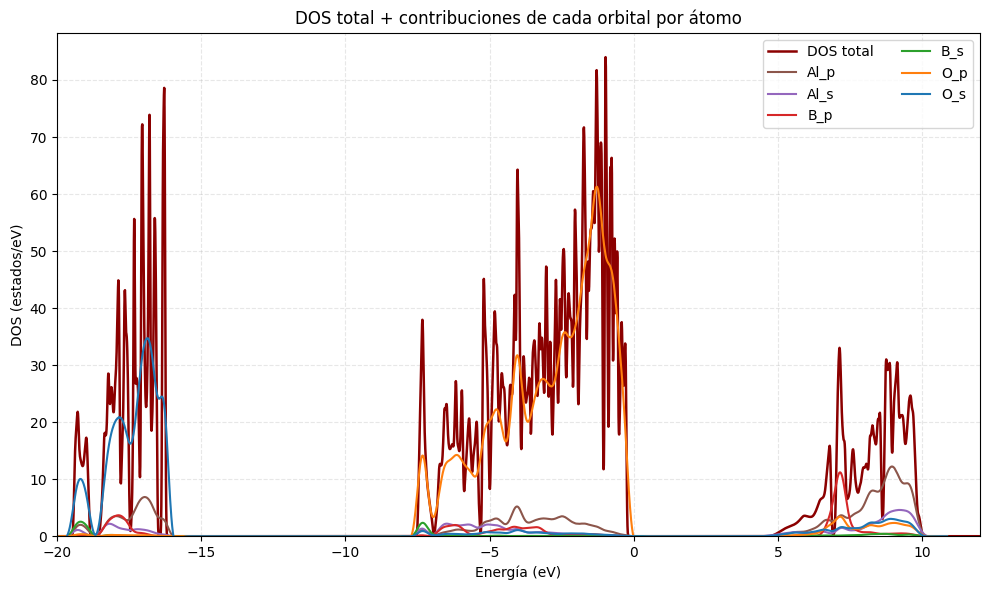

In [ ]:
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import defaultdict

# Cargamos ZIP y extraemos
from google.colab import files
uploaded = files.upload()
with zipfile.ZipFile("borato_pdos.zip", 'r') as zip_ref:
    zip_ref.extractall("borato_pdos")

# Leo DOS total y hago corrimiento en energía del nivel de Fermi (QE lo mueve a veces) y suavizo DOS total (sólo por claridad visual)
dos = pd.read_csv("borato_pdos/Nueva carpeta/Borato (9).dos", delimiter="\s+", skiprows=1)
dos.columns = ['E', 'dos', 'int']
shift = -4
dos["E_shifted"] = dos["E"] + shift
dos["dos_suavizado"] = gaussian_filter1d(dos["dos"], sigma=2)

# Leo y agrupo PDOS por orbital
archivos_pdos = glob.glob("borato_pdos/**/*.pdos*", recursive=True)
pdos_grupo = defaultdict(list)

for archivo in archivos_pdos:
    try:
        nombre = os.path.basename(archivo)
        elemento = nombre.split('atm#')[1].split('(')[1].split(')')[0]
        orbital_num = nombre.split('wfc#')[1].split('(')[0]

        # Reemplazo numérico por letras para los orbitales
        if orbital_num == '1':
            orbital = 's'
        elif orbital_num == '2':
            orbital = 'p'
        else:
            orbital = f"orb{orbital_num}"

        clave = f"{elemento}_{orbital}"

        df = pd.read_csv(archivo, delim_whitespace=True, comment="#", header=None, usecols=[0,1])
        df.columns = ["E", "ldos"]
        df["E_shifted"] = df["E"] + shift
        pdos_grupo[clave].append(df)
    except Exception as e:
        print(f"Error procesando {archivo}: {e}")

# PDOS sumadas por tipo de átomo y orbital
pdos_suma = {}
for clave, lista_df in pdos_grupo.items():
    base = lista_df[0][["E_shifted"]].copy()
    base["ldos"] = sum(df["ldos"].values for df in lista_df)
    pdos_suma[clave] = base

# Graficamos
plt.figure(figsize=(10,6))

# DOS suavizada
plt.plot(dos["E_shifted"], dos["dos_suavizado"], label="DOS total", color="darkred", linewidth=1.8)

# Colores personalizados
colores_personalizados = {
    "O_s": "#1f77b4",     # azul
    "O_p": "#ff7f0e",     # naranja
    "B_s": "#2ca02c",     # verde
    "B_p": "#d62728",     # rojo
    "Al_s": "#9467bd",    # violeta
    "Al_p": "#8c564b",    # marrón
}

# Grafico cada PDOS con su color
for clave in sorted(pdos_suma.keys()):
    df = pdos_suma[clave]
    color = colores_personalizados.get(clave, "gray")  # gris si no está definido
    plt.plot(df["E_shifted"], df["ldos"], label=clave, color=color)

plt.xlabel("Energía (eV)")
plt.ylabel("DOS (estados/eV)")
plt.title("DOS total + contribuciones de cada orbital por átomo")
plt.xlim(-20, 12)
plt.ylim(bottom=0)
plt.legend(fontsize=10, loc='upper right', ncol=2, frameon=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**ESTA CELDA ES SÓLO PARA GRAFICAR LO ANTERIOR CON OTROS COLORES**

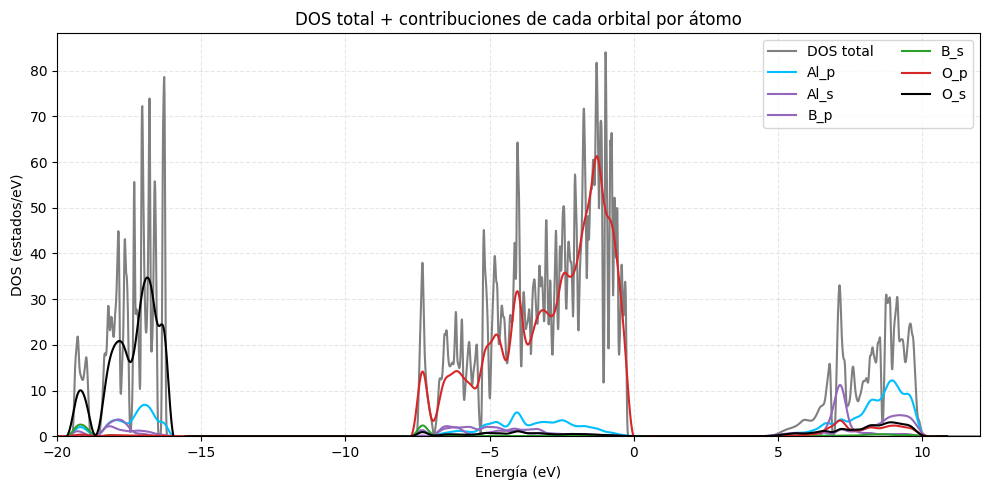

In [ ]:
plt.figure(figsize=(10,5))

# DOS suavizada
plt.plot(dos["E_shifted"], dos["dos_suavizado"], label="DOS total", color="grey", linewidth=1.5)

# Colores personalizados
colores_personalizados = {
    "O_s": "#000000",     # azul
    "O_p": "#D62728",     # naranja
    "B_s": "#2ca02c",     # verde
    "B_p": "#9467BD",     # rojo
    "Al_s": "#9467bd",    # violeta
    "Al_p": "#00BFFF",    # marrón
}

# Grafico cada PDOS con su color
for clave in sorted(pdos_suma.keys()):
    df = pdos_suma[clave]
    color = colores_personalizados.get(clave, "gray")
    plt.plot(df["E_shifted"], df["ldos"], label=clave, color=color)

plt.xlabel("Energía (eV)")
plt.ylabel("DOS (estados/eV)")
plt.title("DOS total + contribuciones de cada orbital por átomo")
plt.xlim(-20, 12)
plt.ylim(bottom=0)
plt.legend(fontsize=10, loc='upper right', ncol=2, frameon=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
